## IMPORT DAS VÁRIAVEIS DE DADOS

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

membroexcel = 'banco-de-dados/perna-esquerda/08-05/Y E1 Q1 Excel.xlsx' #JOELHO 1, QUADRIL 0
membrocsv = 'banco-de-dados/perna-esquerda/08-05/Y JE1 Q1.csv' #JOELHO 1, QUADRIL 0
df_csv = pd.read_csv(membrocsv, header=0, usecols=lambda col: col.strip(), engine='python')
df_excel = pd.read_excel(membroexcel)

### PLOTAGEM DOS GRÁFICOS DO CSV 
- COMPARAÇÃO DOS VALORES DE ANGULOS DO JOELHO E DA CINTURA

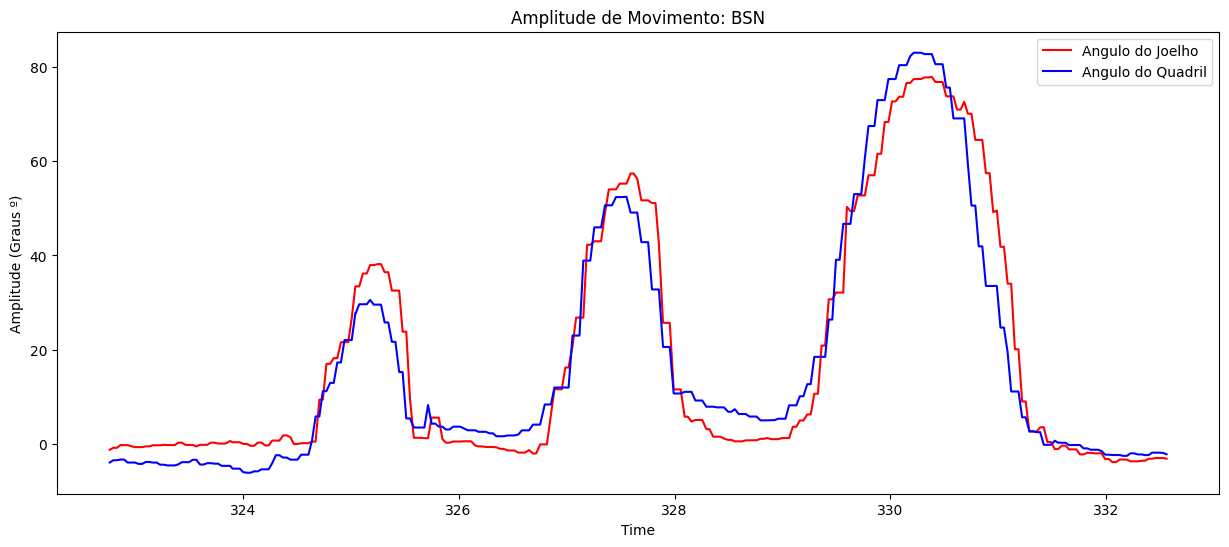

In [123]:
tempo = df_csv.columns[0] 
ang_joelho = df_csv.columns[-1]
ang_quadril = df_csv.columns[-2]

# Criando o gráfico usando a primeira e a última coluna
plt.figure(figsize=(15, 6))
plt.plot(df_csv[tempo], (df_csv[ang_joelho]*-1) + 180, color = 'red')
plt.plot(df_csv[tempo], (df_csv[ang_quadril]*-1) +180, color = 'blue')
plt.title('Amplitude de Movimento: BSN')
plt.xlabel(tempo)
plt.legend(['Angulo do Joelho', 'Angulo do Quadril'])
plt.ylabel("Amplitude (Graus º)")
plt.show()

## PLOTAGEM DOS GRÁFICOS EXCEL
- COMPARAÇÃO DOS ANGULOS DO JOELHO E DO QUADRIL


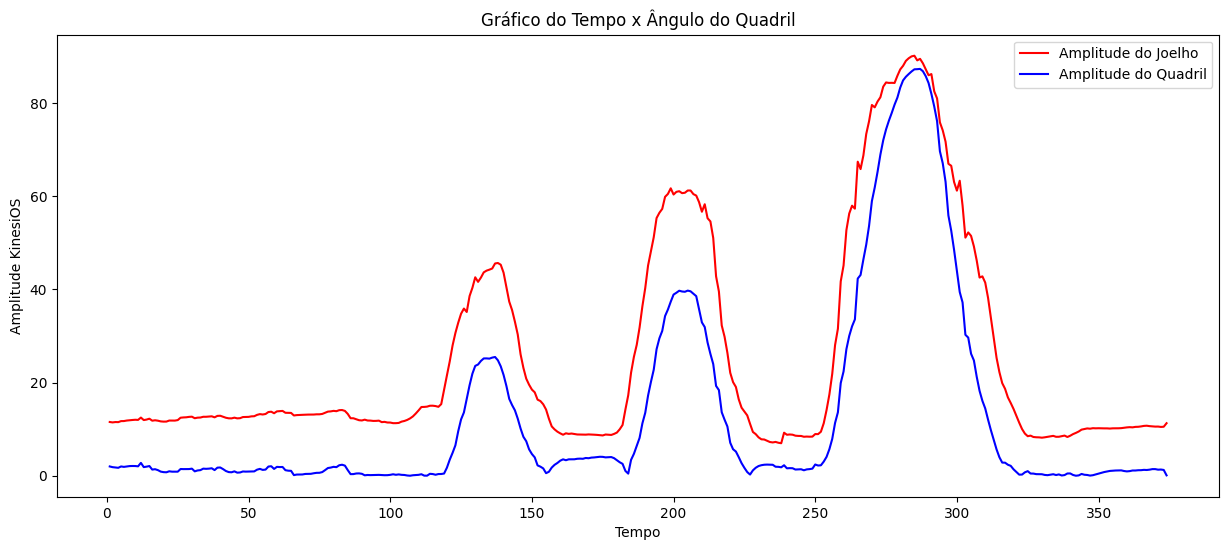

In [124]:
quadro = df_excel['Quadro']
amplitude_joelho = df_excel['Amplitude do Joelho (Esquerdo)']
amplitude_quadril = df_excel['Amplitude do Quadril (Esquerdo)']

plt.figure(figsize=(15, 6))
plt.plot(quadro, amplitude_joelho, color = 'red' )
plt.plot(quadro, amplitude_quadril, color = 'blue')
plt.xlabel("Tempo")
plt.ylabel("Amplitude KinesiOS")
plt.title("Gráfico do Tempo x Ângulo do Quadril")
plt.legend(['Amplitude do Joelho', 'Amplitude do Quadril'])
plt.show()

## PLOTAGEM DOS QUATRO GRÁFICOS EM CONJUNTO
- COMPARAÇÃO DOS VALORES OBTIDOS DE UMA MESMA MEDIÇÃO



Indice e angulo do pico BSN
75     38.1590
145    57.3800
228    77.8654
Name: Goniometry Leg Angle, dtype: float64

Indice e tempo do pico BSN
75     325.2491
145    327.5929
228    330.3834
Name: Time, dtype: float64

Indices dos picos Excel
[137 198 284]

Amplitude dos angulos Excel
137    45.69
198    61.73
284    90.21
Name: Amplitude do Joelho (Esquerdo), dtype: float64

Tempo dos picos Excel
137    138
198    199
284    285
Name: Quadro, dtype: int64

Diferença de tempo entre picos BSN:  2.567149999999998

Tempo até pico BSN:  2.4805000000000064

Diferença de tempo entre picos KIN:  73.5

Multiplicador de tempos:  28.63097208967145

Offset Tempo:  320.4291448979592


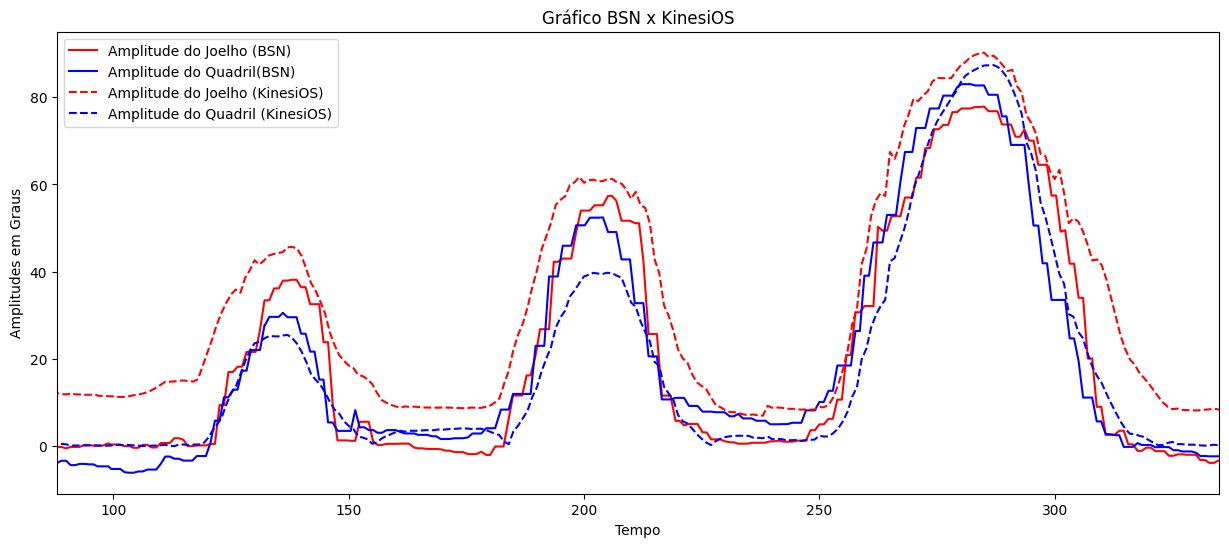

In [125]:
## PEGANDO VARIÁVEIS E PICOS
tempo = df_csv.columns[0] 
ang_joelho = df_csv.columns[-1]
ang_quadril = df_csv.columns[-2]
    
quadro = df_excel['Quadro']
amplitude_joelho  = df_excel['Amplitude do Joelho (Esquerdo)']
amplitude_quadril = df_excel['Amplitude do Quadril (Esquerdo)']

peaks_BSN_1, prop = find_peaks((df_csv[ang_joelho]*-1) + 180, distance = 50, height=(df_csv[ang_joelho][0]*-1) + 190)
peaks_BSN_2, prop = find_peaks((df_csv[ang_quadril]*-1) + 180, distance = 50, height=(df_csv[ang_quadril][0]*-1) + 190)
peaks_KIN_1, prop = find_peaks(amplitude_joelho, distance = 50, height = amplitude_joelho[0] + 10)
peaks_KIN_2, prop = find_peaks(amplitude_quadril, distance = 50, height = amplitude_quadril[0] + 10)

## PRINTANDO OS VALORES DE PICOS
print("\nIndice e angulo do pico BSN")
print((df_csv[ang_joelho][peaks_BSN_1]*-1) + 180) #printa o angulo, não precisa saber na real, mas bom p debugar

print("\nIndice e tempo do pico BSN")
print(df_csv[tempo][peaks_BSN_1]) #printa o momento em que houve o pico -> usado pra sincronizar

print("\nIndices dos picos Excel")
print(peaks_KIN_1)

print("\nAmplitude dos angulos Excel")
print(df_excel['Amplitude do Joelho (Esquerdo)'][peaks_KIN_1])

print("\nTempo dos picos Excel")
print(df_excel['Quadro'][peaks_KIN_1])

## DEFININDO OS OFFSETS
tempo2 = peaks_BSN_1[2]
tempo1 = peaks_BSN_1[1]
tempo0 = peaks_BSN_1[0]
bsn_delta_picos = df_csv[tempo][tempo1] - df_csv[tempo][tempo0]
bsn_delta_picos = (bsn_delta_picos + df_csv[tempo][tempo2] - df_csv[tempo][tempo1])/2
print("\nDiferença de tempo entre picos BSN: ", bsn_delta_picos)

bsn_tempoatepico = df_csv[tempo][tempo0] - df_csv[tempo][0]
print("\nTempo até pico BSN: ", bsn_tempoatepico)

tempo2 = peaks_KIN_1[2]
tempo1 = peaks_KIN_1[1]
tempo0 = peaks_KIN_1[0]
kin_delta_picos = df_excel['Quadro'][tempo1] - df_excel['Quadro'][tempo0]
kin_delta_picos = (kin_delta_picos + df_excel['Quadro'][tempo2] - df_excel['Quadro'][tempo1])/2
print("\nDiferença de tempo entre picos KIN: ", kin_delta_picos)

multiplicador_tempo = kin_delta_picos/bsn_delta_picos
print("\nMultiplicador de tempos: ", multiplicador_tempo)

offset_tempo = df_csv[tempo][0] - df_excel['Quadro'][tempo0]/multiplicador_tempo + bsn_tempoatepico
print("\nOffset Tempo: ", offset_tempo)

## PLOTANDO OS GRAFICOS COM OS OFFSETS
plt.figure(figsize=(15, 6))
plt.plot((df_csv[tempo]-offset_tempo)*multiplicador_tempo, (df_csv[ang_joelho]*-1) + 180, linestyle='-', color = 'red') # tem que arrumar alguma maneira de fazer esse offset automaticamente
plt.plot((df_csv[tempo]-offset_tempo)*multiplicador_tempo, (df_csv[ang_quadril]*-1) + 180, linestyle='-', color = 'blue') # pegar o maior pico dos dois e juntar, talvez mas isso ai vai desconsiderar offsets 
plt.plot(quadro, amplitude_joelho, linestyle='--', color = 'red')                                     # ou utilizar codigo que já desqualifica os offsets
plt.plot(quadro, amplitude_quadril, linestyle='--', color = 'blue')
plt.xlim(df_excel['Quadro'][tempo0]-50,df_excel['Quadro'][tempo2]+50)
plt.xlabel("Tempo")
plt.ylabel("Amplitudes em Graus")
plt.title("Gráfico BSN x KinesiOS")
plt.legend(['Amplitude do Joelho (BSN)', 'Amplitude do Quadril(BSN)','Amplitude do Joelho (KinesiOS)','Amplitude do Quadril (KinesiOS)'])
plt.show()